The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


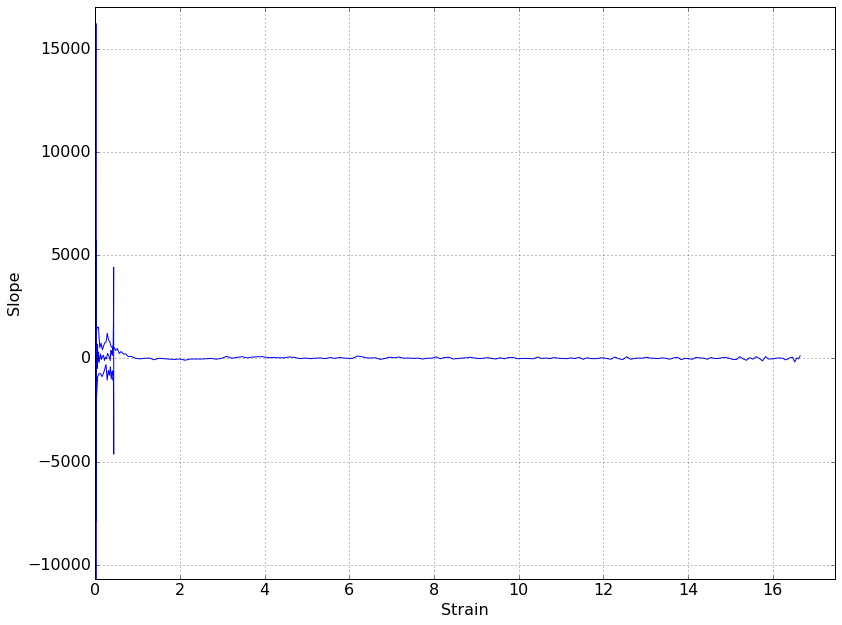

In [40]:
%load_ext autoreload
%autoreload 2  """Reloads all functions automatically"""
%matplotlib inline

from irreversible_stressstrain import StressStrain as strainmodel
import test_suite as suite
import graph_suite as plot
import numpy as np

model = strainmodel('ref/HSRS/22').get_experimental_data()

strain = model[:,0]
stress = model[:,1]

slopes = []

"""Approximating the partial derivatives of stress/strain"""
for index in xrange(len(stress)-1):
    slopes.append((stress[index+1]-stress[index])/(strain[index+1]-strain[index]))
    
"""Now what if we have strain vs slope"""
strainvslope = suite.combine_data(strain,slopes)
plot.plot2D(strainvslope,'Strain','Slope')

## It seems that based on these results it should be easy to cluster the data points

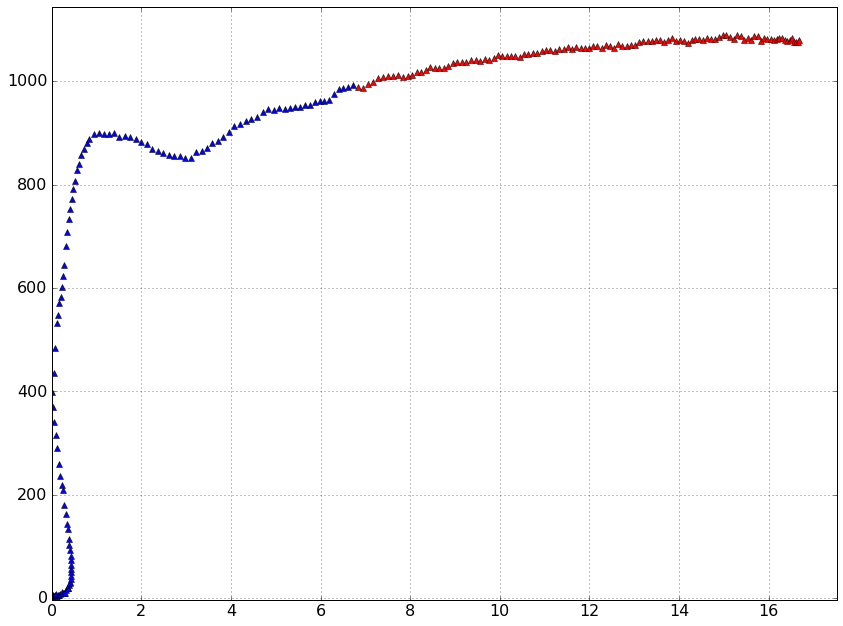

In [37]:
predictions = suite.kcluster(strainvslope, numclusters=2, init='random').predict(strain[:,None][:])
elastic, plastic = suite.splitdata(model,predictions)

plot.plotmult2D(elastic,plastic)

## This seems erroneous so let's look at the slopes that it believes are part of the same group

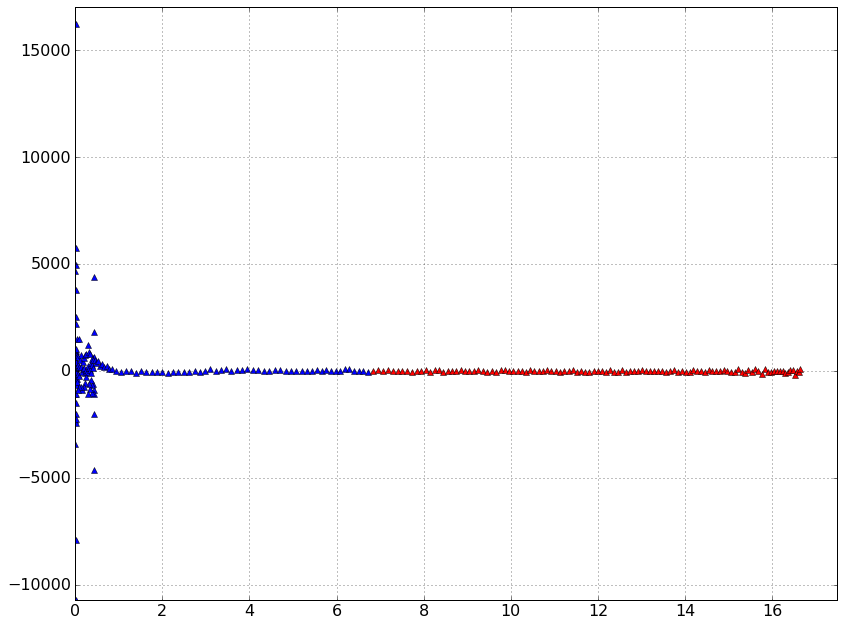

In [38]:
elastic_slope, plastic_slope = suite.splitdata(strainvslope, predictions)
plot.plotmult2D(elastic_slope,plastic_slope)

## Once the data slope begins decreasing, if we are far enough along we can say with confidence that yield is beginning

In [73]:
standard_deviation = np.std(slopes[:len(slopes)/4])
print standard_deviation

3122.09226699


In [75]:
yield_spot = 0

for index, slope in enumerate(slopes):
    
    if slope<-20 and index>(len(slopes)/4.):
        if slopes[index+1]<-20:
            yield_spot=index
            break
        
#print strain[yield_spot],stress[yield_spot]
#print slopes      

In [103]:
num_intervals = 10

# -- divide into ten intervals and print stddev of each
divs = [np.std(vals) for vals in np.array_split(slopes,num_intervals)]

# -- stdev of the whole thing
stdev = np.std(slopes)

interval = 0
while divs[interval] > stdev:
    interval = interval + 1
    
# -- found yield strain (ONLY TENTATIVELY WORKS -- REFINE THIS)
print stress[interval*len(divs)/num_intervals]
print divs

1.5367526405
[4612.0882992710231, 426.06206684630507, 1515.1298640895604, 421.87182234860603, 48.777293699237568, 33.870484894562971, 28.784670818335488, 33.270855805159862, 31.012422403782136, 64.63547777934707]
